In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
import cv2
img=cv2.imread('avatar.jpg',0)

PADDING

In [13]:
constant=np.pad(img,((101,101),(101,101)),mode='constant')
reflect=np.pad(img,((101,101),(101,101)),mode='reflect')
wrap=np.pad(img,((101,101),(101,101)),mode='wrap')
edge=np.pad(img,((101,101),(101,101)),mode='edge')
histo, bin_edge = np.histogram(img, bins=np.arange(257))
xs = histo / sum(histo)

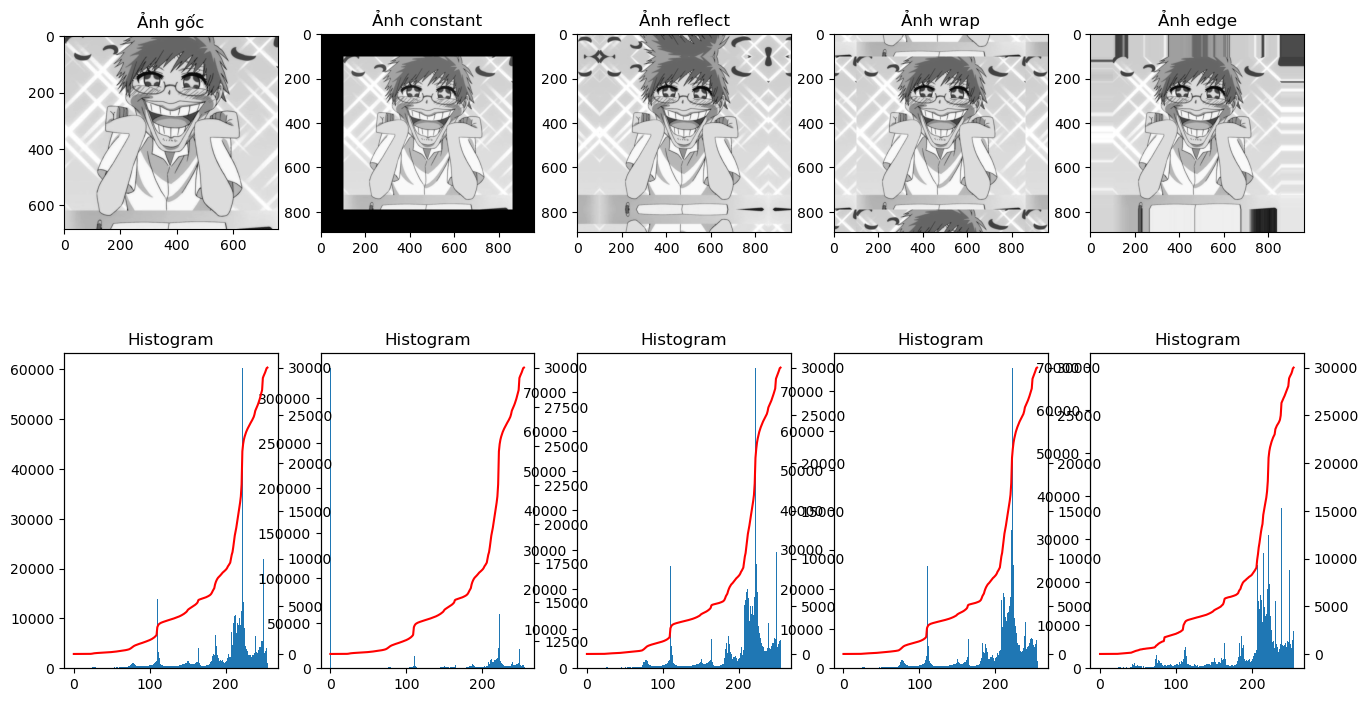

In [21]:
fig,anh=plt.subplots(2,5,figsize=(16,9))
anh[0,0].imshow(img,cmap='gray')
anh[0,0].set_title('Ảnh gốc')
anh[0,1].imshow(constant,cmap='gray')
anh[0,1].set_title('Ảnh constant')
anh[0,2].imshow(reflect,cmap='gray')
anh[0,2].set_title('Ảnh reflect')
anh[0,3].imshow(wrap,cmap='gray')
anh[0,3].set_title('Ảnh wrap')
anh[0,4].imshow(edge,cmap='gray')
anh[0,4].set_title('Ảnh edge')

anh[1,0].hist(img.ravel(),256,[0,256])
anh[1,1].hist(constant.ravel(),256,[0,256])
anh[1,2].hist(reflect.ravel(),256,[0,256])
anh[1,3].hist(wrap.ravel(),256,[0,256])
anh[1,4].hist(edge.ravel(),256,[0,256])
anh[1,0].set_title('Histogram')
anh[1,1].set_title('Histogram')
anh[1,2].set_title('Histogram')
anh[1,3].set_title('Histogram')
anh[1,4].set_title('Histogram')
histt=anh[1,0].twinx()
histt.plot(np.arange(256),xs.cumsum()*3e+4,color='red')

histo2, bin_edge2 = np.histogram(constant, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
histt=anh[1,1].twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')

histo3, bin_edge2 = np.histogram(reflect, bins=np.arange(257))
xs3 = histo3 / sum(histo3)
histt=anh[1,2].twinx()
histt.plot(np.arange(256),xs3.cumsum()*3e+4,color='red')

histo4, bin_edge2 = np.histogram(wrap, bins=np.arange(257))
xs4 = histo4 / sum(histo4)
histt=anh[1,3].twinx()
histt.plot(np.arange(256),xs4.cumsum()*3e+4,color='red')

histo5, bin_edge2 = np.histogram(edge, bins=np.arange(257))
xs5 = histo5 / sum(histo5)
histt=anh[1,4].twinx()
histt.plot(np.arange(256),xs5.cumsum()*3e+4,color='red')


NHIEU GAUSS

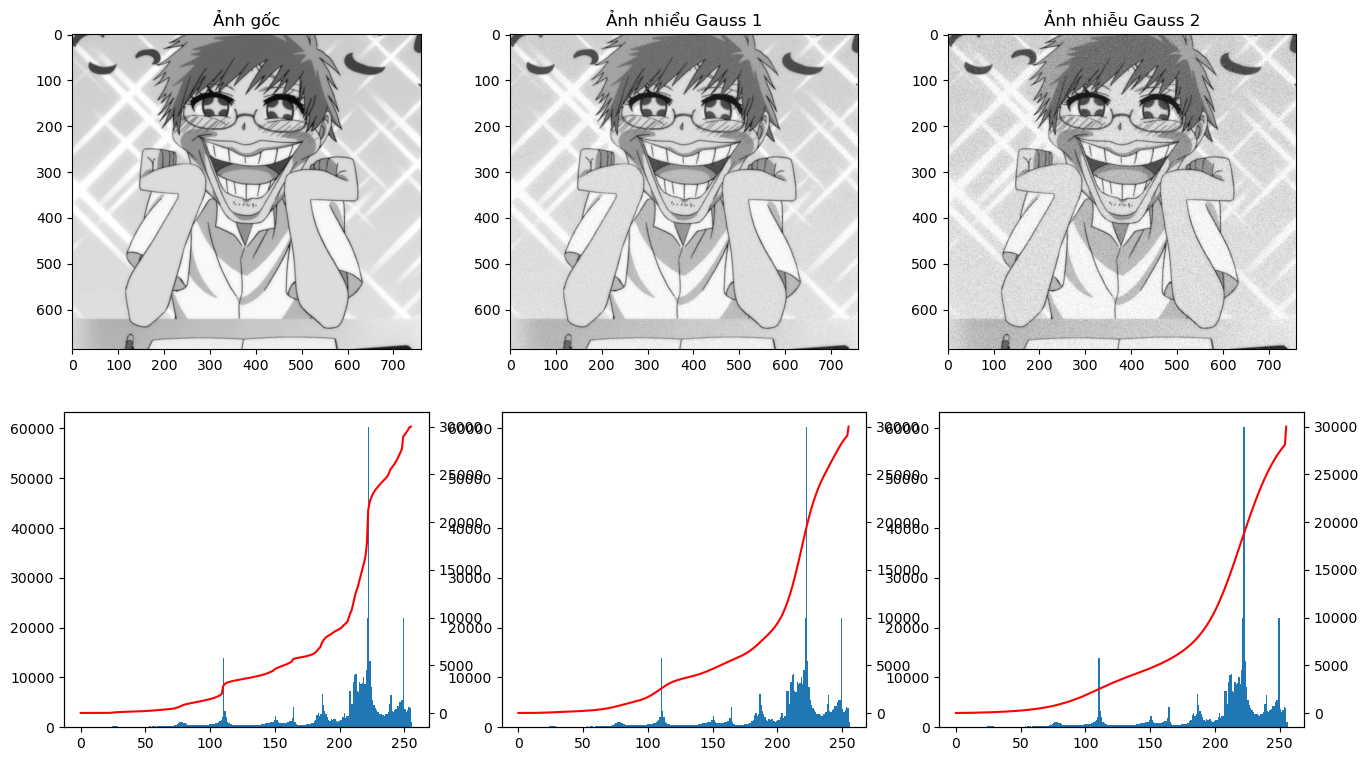

In [24]:
noise1=random_noise(img,mode='gaussian',mean=0,var=0.001)
noise1=np.array(noise1*255,dtype='uint8')
noise2=random_noise(img,mode='gaussian',mean=0,var=0.004)
noise2=np.array(noise2*255,dtype='uint8')
fig1,anh=plt.subplots(2,3,figsize=(16,9))
anh[0,0].imshow(img,cmap='gray')
anh[0,1].imshow(noise1,cmap='gray')
anh[0,2].imshow(noise2,cmap='gray')
anh[0,0].set_title('Ảnh gốc')
anh[0,1].set_title('Ảnh nhiểu Gauss 1')
anh[0,2].set_title('Ảnh nhiễu Gauss 2')
anh[1,0].hist(img.ravel(),256,[0,256])
anh[1,1].hist(img.ravel(),256,[0,256])
anh[1,2].hist(img.ravel(),256,[0,256])
histt=anh[1,0].twinx()
histt.plot(np.arange(256),xs.cumsum()*3e+4,color='red')
histo2, bin_edge2 = np.histogram(noise1, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
histt=anh[1,1].twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')
histo2, bin_edge2 = np.histogram(noise2, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
histt=anh[1,2].twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')


Nhieu SALT & PEPPER

In [ ]:
salt_pepper=np.copy(img)
salt_pepper[salt_pepper>100]